In [22]:
import numpy as np
import IPython
import scipy.io.wavfile
import matplotlib.pyplot as plt

sampleRate = 8000

Text(0.5,1,'White noise')

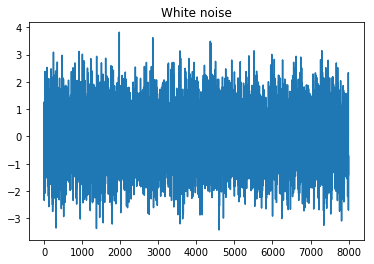

In [50]:
# Exercise 1
# White Noise

white_noise = np.random.randn(sampleRate)

IPython.display.display( IPython.display.Audio( white_noise, rate=sampleRate)) 

plt.plot(white_noise)
plt.title("White noise")

Text(0.5,1,'sinusoidal tone of frequency 440 Hz')

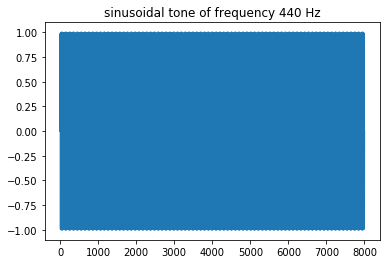

In [49]:
# A sinusoidal tone of frequency 440 Hz

frequency = 440

sin = np.sin(frequency * 2 * np.pi * np.linspace(0, 1, sampleRate))

IPython.display.display( IPython.display.Audio( sin, rate=sampleRate)) 

plt.plot(sin)
plt.title("sinusoidal tone of frequency 440 Hz")

Text(0.5,1,'linear chirp from 0 to 4kHZ')

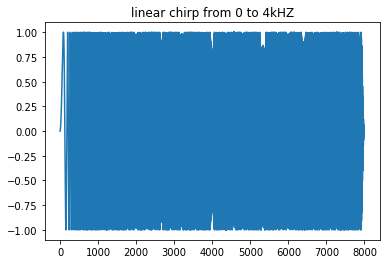

In [155]:
# A linear chirp from 0 to 4kHZ

f1 = 4000 
f0 = 0
T = 1
k = (f1 - f0)/T
t = np.linspace(0, 1, sampleRate)
chirp = np.sin( 2 * np.pi * t * t * k / 2)

IPython.display.display( IPython.display.Audio( chirp, rate=sampleRate)) 

plt.plot(chirp)
plt.title("linear chirp from 0 to 4kHZ")

Text(0.5,1,'sinusoidal tone with amplitude from 100 to 0.0001')

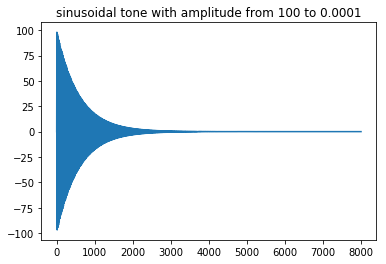

In [53]:
# A sinusoidal tone with amplitude from 100 to 0.0001

frequency = 440

sin = np.logspace(2, -4, sampleRate) * np.sin(frequency * 2 * np.pi * np.linspace(0, 1, sampleRate))

IPython.display.display( IPython.display.Audio( sin, rate=sampleRate)) 

plt.plot(sin)
plt.title("sinusoidal tone with amplitude from 100 to 0.0001")

In [41]:
# A stereo file

left = np.logspace(2, -4, sampleRate/4) * np.sin(523.24 * 2 * np.pi * np.linspace(0, 1, sampleRate/4))
right = np.logspace(2, -4, sampleRate/4) * np.sin(784 * 2 * np.pi * np.linspace(0, 1, sampleRate/4))
stereo = np.zeros((2,4000), dtype=np.float32)
stereo[0][:2000] = left
stereo[1][2000:] = right

IPython.display.display( IPython.display.Audio( stereo, rate=sampleRate)) 

C:\Users\Finale\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Finale\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


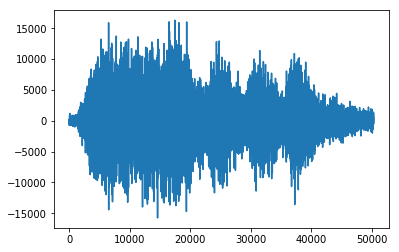

In [132]:
# handel.dat

f = np.fromfile("./handel.dat", dtype=np.int16)

IPython.display.display( IPython.display.Audio( f, rate=8000*3)) 

plt.plot(f)
# So the sample rate is 8000*3 = 24000 Hz, which is 24kHZ

In [54]:
# Exercise 2
# The problem here is the the way that WAV saves the array.
ping_pong = stereo.T
scipy.io.wavfile.write("ping-pong.wav", 8000, ping_pong)

In [122]:
# Exercise 3

# 3.1 1234
frate, f = scipy.io.wavfile.read("./1234.wav")

l = len(f)
one = f[: int(l/4)].copy()
two = f[int(l/2):int(3*l/4)].copy()
three = f[int(l/4):int(l/2)].copy() 
four = f[int(3*l/4):].copy()

count = np.hstack([one, two, three, four])

IPython.display.display( IPython.display.Audio( count, rate=frate)) 

# one, two ,three, four!

In [123]:
# 3.2 4321

countdown = np.hstack([four, three, two, one])

IPython.display.display( IPython.display.Audio( countdown, rate=frate)) 

# four, three, two, one!

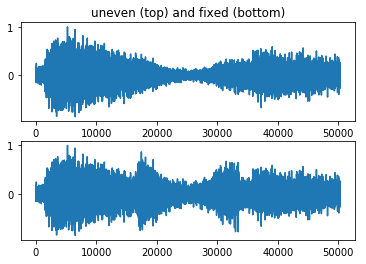

In [148]:
# 3.3 uneven
frate, uneven = scipy.io.wavfile.read("./uneven.wav")
IPython.display.display( IPython.display.Audio( f, rate=frate)) 
l = len(uneven)

fixed = f.copy()
amplify = 2*f[int(l/3):int(2*l/3)]
fixed[int(l/3):int(2*l/3)] = amplify

plt.figure(1)
plt.subplot(211)
plt.plot(uneven)
plt.title("uneven (top) and fixed (bottom)")
plt.subplot(212)
plt.plot(fixed)
plt.show()

IPython.display.display( IPython.display.Audio( fixed, rate=frate)) 


In [152]:
# 3.4

m1_rate, m1 = scipy.io.wavfile.read("./m1.wav")
m2_rate, m2 = scipy.io.wavfile.read("./m2.wav")
mixed = np.hstack([m1[:m1_rate*2], m2[m1_rate*2:]])

IPython.display.display( IPython.display.Audio( mixed, rate=m1_rate)) 


In [159]:
# Exercise 4
from pysoundcard import Stream

fs = 16000
blocksize = 5
s = Stream(samplerate=fs, blocksize=blocksize)
s.start()
for n in range(int(fs*5/blocksize)):
    s.write(s.read(blocksize))
s.stop()
